In [200]:
%cd /Users/jonathancheng/PycharmProjects/espnff/src/

import nfl_schedule as nf
import ff_league_data as ff


/Users/jonathancheng/PycharmProjects/espnff/src


In [ ]:

import os
import requests
import itertools

from bs4 import BeautifulSoup

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

import datetime as dt
# from datetime import date
# from datetime import datetime

import requests
import espn_api
from espn_api.football import League
from espn_api.football import activity

import altair as alt

# import sportsipy.nfl
# from sportsipy.nfl.boxscore import Boxscore
# from sportsipy.nfl.schedule import Schedule
# from sportsipy.nfl.teams import Teams
import nfl_data_py as nfl

# from sportsipy.nfl.teams import Teams

# teams = Teams()
# lions = teams('DET')


## Get NFL Schedule

In [201]:
year_of_interest=2022
df_proteam_schedule = nf.get_nfl_schedule(year_of_interest)
season_start_date = nf.get_season_start_date(df_proteam_schedule)

In [202]:
path = r'/Users/jonathancheng/PycharmProjects/espnff/data'

league_id = 1094090
year = year_of_interest

SWID="{F191FB8C-DB2D-4D24-91FB-8CDB2DED249D}"

swid = SWID
s2='AECJMQHsUHB0FTXdZkw93uY7GRbX8BPnm93Ye6AwvwrMsrZFGg1Lbmi07SWVov2ioN8zGMFDzZiiDSeQCa7WQHaGivGnMfGWLjmfGwkOeLXb5baD1sltp%2B%2BIfHAtl98TpmHgB16ZpGn6g3Bm5vLEA7yDC6HkbD3LSp0E2rGB7hKziLMvZ7mT6ONJFRe8Xp3ApYWSvxPr9cz0pJiI%2FF0blsZ8hyATDJMEyaQ2O%2FypcsViORr6hqYTmXHPuPKnMBfvYC8LQqi1exGw3vnyg6ptsB2Y'

espn_s2 = s2


## Generate League object

In [203]:
league = ff.fetch_espn_api(league_id, year, espn_s2, swid)
activity_ls = league.recent_activity(1000000)

In [6]:
wk_ls = ff.get_weeks(league)

## Get Acquisitions Data

In [7]:
# fetch league data, wrangle into acquisitions DataFrame

acq_data_flat_ls = ff.get_acq_ls(activity_ls)

df_acq = ff.build_df_acq(acq_data_flat_ls)

## Get Draft Data

In [8]:
df_draft,drafted_players = ff.build_df_draft(league)

## Get total points of rostered players Dataframe

In [9]:
df_rostered = ff.build_df_rostered(league)

## Get total points of free agent players Dataframe

In [10]:
df_FA = ff.build_df_FA(league)

In [11]:
# Generate all player stats dataframe, including all Free Agents
# df_player_stats = pd.concat([df_rostered,df_FA],axis=0)
df_player_stats = ff.build_df_player_stats(df_rostered,df_FA)


In [12]:
df_draft_stats = ff.build_df_draft_stats(df_draft,df_player_stats)

In [13]:
df_acq_stats = ff.build_df_acq_stats(df_acq,df_player_stats)

In [14]:
df_acq_final = ff.build_df_acq_final(season_start_date, df_draft_stats, df_acq_stats, drafted_players)

## Get player_box_scores from fantasy season

In [15]:
df_player_box_scores = ff.build_df_player_box_scores(league, wk_ls)

## Construct df_stints

In [124]:
df_stints=ff.build_df_stints(df_acq_final, df_proteam_schedule)

# df_stints.head()

In [126]:
df_stints = df_stints.reset_index().reset_index()\
    .rename(columns={'level_0':'Stint_id'})\
    .drop('index',axis=1)

In [127]:
df_stints

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks)
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
1,1,A.J. Brown,Ice City USA,PHI,2022-09-07,34,NaT,"[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1..."
2,2,AJ Dillon,The Genaissance,GB,2022-09-07,4,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15..."
3,3,Aaron Jones,Kirk-life Balance,GB,2022-09-07,42,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15..."
4,4,Aaron Rodgers,Frankel's Cankles,GB,2022-09-07,3,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15..."
...,...,...,...,...,...,...,...,...
398,398,Younghoe Koo,Door City,ATL,2022-12-29,1,NaT,"[17, 18]"
399,399,Zach Ertz,Frankel's Cankles,ARI,2022-09-07,2,2022-11-17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
400,400,Zamir White,Sweetless in Seattle,OAK,2022-11-27,1,2022-12-28,"[12, 13, 14, 15, 16]"
401,401,Zay Jones,Kittle Me Elmo,JAX,2022-11-30,5,NaT,"[13, 14, 15, 16, 17, 18]"


{'Jonathan Taylor': 'RB',
 'Amon-Ra St. Brown': 'WR',
 'Jerry Jeudy': 'WR',
 'Mike Williams': 'WR',
 'Travis Etienne Jr.': 'RB',
 'Elijah Mitchell': 'RB',
 'Taysom Hill': 'TE',
 'Trevor Lawrence': 'QB',
 'Brandon Aiyuk': 'WR',
 'Ravens D/ST': 'D/ST',
 'Jason Myers': 'K',
 'Chase Claypool': 'WR',
 'J.K. Dobbins': 'RB',
 'Deshaun Watson': 'QB',
 'Aaron Rodgers': 'QB',
 'Christian McCaffrey': 'RB',
 'Derrick Henry': 'RB',
 'Jaylen Waddle': 'WR',
 'Adam Thielen': 'WR',
 'Dak Prescott': 'QB',
 'Daniel Carlson': 'K',
 'Jamaal Williams': 'RB',
 'Tyler Lockett': 'WR',
 'Greg Dulcich': 'TE',
 'Gerald Everett': 'TE',
 'Patriots D/ST': 'D/ST',
 'Evan Engram': 'TE',
 'Stefon Diggs': 'WR',
 'Patrick Mahomes': 'QB',
 'Keenan Allen': 'WR',
 'Cam Akers': 'RB',
 'Courtland Sutton': 'WR',
 'T.J. Hockenson': 'TE',
 'Devin Singletary': 'RB',
 'Raheem Mostert': 'RB',
 'Khalil Herbert': 'RB',
 'Jerick McKinnon': 'RB',
 'Zonovan Knight': 'RB',
 'Evan McPherson': 'K',
 'Jaguars D/ST': 'D/ST',
 'Joe Mixon': 'R

In [192]:
def get_total_pts_per_player(player,stint, df_player_box_scores):
    if stint:
        g = df_player_box_scores.groupby(by='Player')
        df = g.get_group(player)
        return df[df['Week'].isin(stint)]['Total points'].sum()

df_stints['Total points per stint'] = df_stints.apply(lambda x: get_total_pts_per_player(x['Player'], x['Stint (wks)'], df_player_box_scores),axis=1).fillna(0)

In [ ]:
g = df_player_box_scores.groupby(by='Player')
df = g.get_group(player)
return df[df['Week'].isin(stint)]['Total points'].sum()

In [194]:
df_player_box_scores

,Player,Position,Week,Team,Total points
0,Mark Andrews,TE,1,Kirk-life Balance,7.7
1,Saquon Barkley,RB,1,Kirk-life Balance,30.4
2,Allen Lazard,WR,1,Kirk-life Balance,0.0
3,Alvin Kamara,RB,1,Kirk-life Balance,6.1
4,Aaron Jones,RB,1,Kirk-life Balance,9.1
...,...,...,...,...,...
2766,Gardner Minshew,QB,17,Sweetless in Seattle,12.8
2767,Michael Badgley,K,17,Sweetless in Seattle,12.0
2768,Tyler Allgeier,RB,17,Sweetless in Seattle,16.0
2769,Jared Goff,QB,17,Sweetless in Seattle,22.4


In [170]:
df_player_box_scores

,Player,Position,Week,Team,Total points
0,Mark Andrews,TE,1,Kirk-life Balance,7.7
1,Saquon Barkley,RB,1,Kirk-life Balance,30.4
2,Allen Lazard,WR,1,Kirk-life Balance,0.0
3,Alvin Kamara,RB,1,Kirk-life Balance,6.1
4,Aaron Jones,RB,1,Kirk-life Balance,9.1
...,...,...,...,...,...
2766,Gardner Minshew,QB,17,Sweetless in Seattle,12.8
2767,Michael Badgley,K,17,Sweetless in Seattle,12.0
2768,Tyler Allgeier,RB,17,Sweetless in Seattle,16.0
2769,Jared Goff,QB,17,Sweetless in Seattle,22.4


In [128]:
df_stints_long = df_stints.explode(['Stint (wks)'])

In [129]:
df_stints_long=df_stints_long.rename(columns={'Stint (wks)':'Week'})

In [130]:
df_points_scored = df_stints_long.merge(df_player_box_scores, how='inner')

df_points_scored.head()

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week,Position,Total points
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,1,D/ST,6.0
1,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,2,D/ST,13.0
2,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,3,D/ST,9.0
3,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,4,D/ST,22.0
4,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,5,D/ST,15.0


In [135]:
df_stints[df_stints['Player'].str.contains('Daniel Jones')]

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks)
107,107,Daniel Jones,is the fantasy season everett?,NYG,2022-10-13,1,2022-10-14,[]
108,108,Daniel Jones,Flex Player All Stars,NYG,2022-10-26,5,2022-11-01,[8]
109,109,Daniel Jones,Door City,NYG,2022-11-09,3,2022-11-16,[10]
110,110,Daniel Jones,Ice City USA,NYG,2022-11-17,1,2022-11-23,[11]
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,"[13, 14, 15, 16, 17, 18]"


In [136]:
df_stints_long[df_stints_long['Player'].str.contains('Daniel Jones')]

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week
107,107,Daniel Jones,is the fantasy season everett?,NYG,2022-10-13,1,2022-10-14,NaN
108,108,Daniel Jones,Flex Player All Stars,NYG,2022-10-26,5,2022-11-01,8
109,109,Daniel Jones,Door City,NYG,2022-11-09,3,2022-11-16,10
110,110,Daniel Jones,Ice City USA,NYG,2022-11-17,1,2022-11-23,11
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,13
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,14
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,15
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,16
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,17
111,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,18


In [155]:
df_points_scored

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week,Position,Total points
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,1,D/ST,6.0
1,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,2,D/ST,13.0
2,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,3,D/ST,9.0
3,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,4,D/ST,22.0
4,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,5,D/ST,15.0
...,...,...,...,...,...,...,...,...,...,...
2569,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,13,RB,14.3
2570,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,14,RB,14.7
2571,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,15,RB,2.3
2572,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,16,RB,1.8


In [167]:
df_wks_played = df_points_scored.groupby(by='Stint_id').agg({'Week':list}).reset_index().rename({'Week':'Stint (weeks)'})

In [168]:
df_points_scored.merge(df_wks_played, on='Stint_id',how='right')

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week_x,Position,Total points,Week_y
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,1,D/ST,6.0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
1,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,2,D/ST,13.0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
2,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,3,D/ST,9.0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
3,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,4,D/ST,22.0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
4,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,5,D/ST,15.0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
2569,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,13,RB,14.3,"[13, 14, 15, 16, 17]"
2570,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,14,RB,14.7,"[13, 14, 15, 16, 17]"
2571,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,15,RB,2.3,"[13, 14, 15, 16, 17]"
2572,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,16,RB,1.8,"[13, 14, 15, 16, 17]"


In [141]:
df_points_scored[df_points_scored['Player'].str.contains('Daniel Jones')]

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week,Position,Total points
747,108,Daniel Jones,Flex Player All Stars,NYG,2022-10-26,5,2022-11-01,8,QB,9.0
748,109,Daniel Jones,Door City,NYG,2022-11-09,3,2022-11-16,10,QB,18.2
749,110,Daniel Jones,Ice City USA,NYG,2022-11-17,1,2022-11-23,11,QB,24.6
750,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,13,QB,17.1
751,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,14,QB,19.2
752,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,15,QB,9.9
753,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,16,QB,20.6
754,111,Daniel Jones,More than a Thielen,NYG,2022-12-01,5,NaT,17,QB,36.1


In [123]:
df_points_scored.groupby(by=['Player','Stint_id']).agg.sort_values(by=['Total points'])

AttributeError: 'function' object has no attribute 'sort_values'

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week,Position,Total points
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,1,D/ST,6.0
1,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,2,D/ST,13.0
2,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,3,D/ST,9.0
3,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,4,D/ST,22.0
4,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,5,D/ST,15.0
...,...,...,...,...,...,...,...,...,...,...
2569,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,13,RB,14.3
2570,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,14,RB,14.7
2571,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,15,RB,2.3
2572,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,16,RB,1.8


In [195]:
df_stints.head()

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks),Total points per stint
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...",140.0
1,1,A.J. Brown,Ice City USA,PHI,2022-09-07,34,NaT,"[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",244.1
2,2,AJ Dillon,The Genaissance,GB,2022-09-07,4,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",150.3
3,3,Aaron Jones,Kirk-life Balance,GB,2022-09-07,42,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",212.8
4,4,Aaron Rodgers,Frankel's Cankles,GB,2022-09-07,3,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",226.6


In [ ]:
def scatterplot_acquisitions(df, position):

    df = 

    plot_title='test'
    selection = alt.selection_multi(fields=['Team'], bind='legend')

    color = alt.condition(selection,
                            alt.Color('Team:N',
                                    scale=alt.Scale(scheme='tableau20'),),
                            alt.value('lightgray'))

    chart = alt.Chart(df_stints).mark_circle(size=40).encode(
        alt.X('Bid Amount ($)', axis=alt.Axis(grid=False)),
        alt.Y('Total points per stint', axis=alt.Axis(grid=False)),
        color=color,
        opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
        tooltip=['Player', 'Team', 'Bid Amount ($)', 'Total points per stint']
    ).add_selection(selection).properties(
        width=450,
        height=450,
        title=plot_title
    ).configure_axis(
        labelFontSize=18,
        titleFontSize=18
    ).configure_title(fontSize=20).configure_legend(labelFontSize=14, titleFontSize=14)
    return chart
    

In [197]:
# def generate_acquisitions_scatterplot(df, position_subset, acquisition_method):
#     position_subset1 = ''.join(position_subset)
#     plot_title = position_subset1 + ' ' + acquisition_method + ' Spending vs. Total Fantasy Points'
plot_title='test'
selection = alt.selection_multi(fields=['Team'], bind='legend')

color = alt.condition(selection,
                        alt.Color('Team:N',
                                scale=alt.Scale(scheme='tableau20'),),
                        alt.value('lightgray'))

chart = alt.Chart(df_stints).mark_circle(size=40).encode(
    alt.X('Bid Amount ($)', axis=alt.Axis(grid=False)),
    alt.Y('Total points per stint', axis=alt.Axis(grid=False)),
    color=color,
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['Player', 'Team', 'Bid Amount ($)', 'Total points per stint']
).add_selection(selection).properties(
    width=450,
    height=450,
    title=plot_title
).configure_axis(
    labelFontSize=18,
    titleFontSize=18
).configure_title(fontSize=20).configure_legend(labelFontSize=14, titleFontSize=14)
chart
    # return chart

alt.Chart(...)

In [65]:
def generate_acquisitions_scatterplot(df, position_subset, acquisition_method):
    position_subset1 = ''.join(position_subset)
    plot_title = position_subset1 + ' ' + acquisition_method + ' Spending vs. Total Fantasy Points'

    selection = alt.selection_multi(fields=['Team'], bind='legend')

    color = alt.condition(selection,
                          alt.Color('Team:N',
                                    scale=alt.Scale(scheme='tableau20'), sort=team_name_alias_ls),
                          alt.value('lightgray'))

    chart = alt.Chart(df).mark_circle(size=40).encode(
        alt.X('Bid Amount ($)', axis=alt.Axis(grid=False)),
        alt.Y('Total points', axis=alt.Axis(grid=False)),
        color=color,
        opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
        tooltip=['Player-info', 'Team', 'Bid Amount ($)', 'Total points', 'Stint (wks)']
    ).add_selection(selection).properties(
        width=450,
        height=450,
        title=plot_title
    ).configure_axis(
        labelFontSize=18,
        titleFontSize=18
    ).configure_title(fontSize=20).configure_legend(labelFontSize=14, titleFontSize=14)

    return chart

In [70]:
total_pts = pd.DataFrame(data=df_points_scored.groupby(by='Stint_id')['Total points'].agg(sum)).reset_index()

In [80]:
df_stints = df_stints.merge(total_pts)

In [81]:
df_stints.loc[df_stints['Player'].isin(drafted_players),'Drafted'] = True
df_stints['Drafted'] = df_stints['Drafted'].fillna(False)

In [85]:
df_waiver = df_stints[~df_stints['Drafted']]

In [87]:
df_waiver.sort_values(by=['Total points'],ascending=False)

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks),Position,Drafted,Total points
349,369,Trevor Lawrence,is the fantasy season everett?,JAX,2022-10-14,1,NaT,"[6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]",QB,False,211.4
196,207,Jamaal Williams,Frankel's Cankles,DET,2022-09-07,1,NaT,"[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...",RB,False,200.7
154,165,Geno Smith,The Genaissance,SEA,2022-10-12,6,NaT,"[6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]",QB,False,191.6
228,243,Justin Fields,Kittle Me Elmo,CHI,2022-11-02,4,NaT,"[9, 10, 11, 12, 13, 15, 16, 17, 18]",QB,False,172.9
353,374,Tua Tagovailoa,is the fantasy season everett?,MIA,2022-09-21,18,2022-12-20,"[3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]",QB,False,166.3
...,...,...,...,...,...,...,...,...,...,...,...
22,23,Bengals D/ST,Fumble .,CIN,2022-11-16,6,2022-11-24,[11],D/ST,False,0.0
201,212,Jameson Williams,Ice City USA,DET,2022-10-12,1,2022-10-26,[7],WR,False,0.0
226,241,Julio Jones,Door City,TB,2022-09-14,4,2022-09-28,"[2, 3]",WR,False,0.0
273,291,Mike Gesicki,Ice City USA,MIA,2022-11-23,1,2022-11-30,[12],TE,False,0.0


In [90]:
df_waiver['Num games'] = df_waiver['Stint (wks)'].apply(lambda x: len(x))

/var/folders/j5/s494l7rn5_qdk1pm9k01yfl00000gn/T/ipykernel_88198/3362060047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waiver['Num games'] = df_waiver['Stint (wks)'].apply(lambda x: len(x))


In [92]:
df_waiver['Points per game'] = df_waiver['Total points']/df_waiver['Num games']

/var/folders/j5/s494l7rn5_qdk1pm9k01yfl00000gn/T/ipykernel_88198/1467866042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waiver['Points per game'] = df_waiver['Total points']/df_waiver['Num games']


In [95]:
df_waiver = df_waiver[df_waiver['Num games']>=7]

In [97]:
df_waiver.sort_values(by=['Points per game'],ascending=False)

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks),Position,Drafted,Total points,Num games,Points per game
228,243,Justin Fields,Kittle Me Elmo,CHI,2022-11-02,4,NaT,"[9, 10, 11, 12, 13, 15, 16, 17, 18]",QB,False,172.9,9,19.211111
349,369,Trevor Lawrence,is the fantasy season everett?,JAX,2022-10-14,1,NaT,"[6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]",QB,False,211.4,12,17.616667
154,165,Geno Smith,The Genaissance,SEA,2022-10-12,6,NaT,"[6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]",QB,False,191.6,12,15.966667
353,374,Tua Tagovailoa,is the fantasy season everett?,MIA,2022-09-21,18,2022-12-20,"[3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]",QB,False,166.3,12,13.858333
211,223,Jerick McKinnon,Flex Player All Stars,KC,2022-11-16,3,NaT,"[11, 12, 13, 14, 15, 16, 17, 18]",RB,False,108.5,8,13.562500
196,207,Jamaal Williams,Frankel's Cankles,DET,2022-09-07,1,NaT,"[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...",RB,False,200.7,17,11.805882
69,73,Christian Watson,Door City,GB,2022-11-16,12,NaT,"[11, 12, 13, 15, 16, 17, 18]",WR,False,77.1,7,11.014286
87,92,D'Onta Foreman,Kittle Me Elmo,CAR,2022-10-26,10,NaT,"[8, 9, 10, 11, 12, 14, 15, 16, 17, 18]",RB,False,102.5,10,10.250000
223,238,Joshua Palmer,Flex Player All Stars,LAC,2022-11-04,2,2022-12-27,"[9, 10, 11, 12, 13, 14, 15, 16]",WR,False,82.0,8,10.250000
184,195,Isiah Pacheco,Sweetless in Seattle,KC,2022-11-16,4,NaT,"[11, 12, 13, 14, 15, 16, 17, 18]",RB,False,81.4,8,10.175000


In [ ]:
## Build waiver player ranker
# Given Stint 

In [109]:
df_player_box_scores['Week'].isin(list(range(10)))

0        True
1        True
2        True
3        True
4        True
        ...  
2766    False
2767    False
2768    False
2769    False
2770    False
Name: Week, Length: 2771, dtype: bool

<AxesSubplot:>

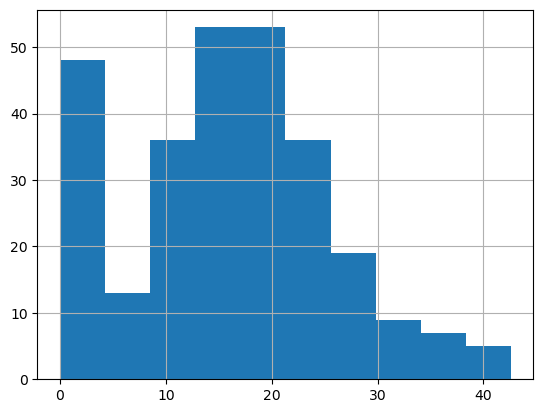

In [115]:
df_player_box_scores[(df_player_box_scores['Position']=='QB') & (df_player_box_scores['Week'].isin(list(range(17))))]['Total points'].hist()

In [88]:
df_waiver.groupby(by=['Player','Team'])['Total points'].agg(sum)

Player              Team                          
Albert Okwuegbunam  Ice City USA                       0.0
Alec Pierce         The Genaissance                   13.2
Austin Hooper       Fumble .                          17.7
Bengals D/ST        Frankel's Cankles                  3.0
                    Fumble .                           0.0
                                                      ... 
Vikings D/ST        is the fantasy season everett?     8.0
Wan'Dale Robinson   Door City                         10.5
Zamir White         Sweetless in Seattle               4.7
Zay Jones           Kittle Me Elmo                    57.7
Zonovan Knight      Flex Player All Stars             38.5
Name: Total points, Length: 159, dtype: float64

In [84]:
df_stints[df_stints['Player'].str.contains('Olave')]

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks),Position,Drafted,Total points
65,69,Chris Olave,Ice City USA,NO,2022-09-07,1,2022-09-16,[1],WR,True,7.6
66,70,Chris Olave,Ice City USA,NO,2022-09-21,2,NaT,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, ...",WR,True,133.6


In [61]:
df_points_scored.groupby('Stint_id')['Week'].apply(list).reset_index().merge(df_stints,how='left')

,Stint_id,Week,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Stint (wks),Position
0,0,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...",49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...",D/ST
1,1,"[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",A.J. Brown,Ice City USA,PHI,2022-09-07,34,NaT,"[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...",WR
2,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",AJ Dillon,The Genaissance,GB,2022-09-07,4,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",RB
3,3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",Aaron Jones,Kirk-life Balance,GB,2022-09-07,42,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",RB
4,4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",Aaron Rodgers,Frankel's Cankles,GB,2022-09-07,3,NaT,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",QB
...,...,...,...,...,...,...,...,...,...,...
376,398,[17],Younghoe Koo,Door City,ATL,2022-12-29,1,NaT,"[17, 18]",K
377,399,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",Zach Ertz,Frankel's Cankles,ARI,2022-09-07,2,2022-11-17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",TE
378,400,"[12, 13, 14, 15, 16]",Zamir White,Sweetless in Seattle,OAK,2022-11-27,1,2022-12-28,"[12, 13, 14, 15, 16]",RB
379,401,"[13, 14, 15, 16, 17]",Zay Jones,Kittle Me Elmo,JAX,2022-11-30,5,NaT,"[13, 14, 15, 16, 17, 18]",WR


In [56]:
df_points_scored

,Stint_id,Player,Team,ProTeam,Added,Bid Amount ($),Dropped,Week,Position,Total points
0,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,1,D/ST,6.0
1,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,2,D/ST,13.0
2,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,3,D/ST,9.0
3,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,4,D/ST,22.0
4,0,49ers D/ST,Big Joshy Style,SF,2022-09-07,1,NaT,5,D/ST,15.0
...,...,...,...,...,...,...,...,...,...,...
2752,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,14,RB,14.7
2753,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,15,RB,2.3
2754,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,16,RB,1.8
2755,402,Zonovan Knight,Flex Player All Stars,NYJ,2022-11-30,2,NaT,17,RB,5.4


In [50]:
df_points_scored[df_points_scored['Total points']

KeyError: "None of [Float64Index([ 6.0, 13.0,  9.0, 22.0, 15.0,  4.0, -4.0,  5.0,  8.0, 10.0,\n              ...\n              31.9,  1.6,  3.9,  nan, 14.3, 14.7,  2.3,  1.8,  5.4,  nan],\n             dtype='float64', length=2757)] are in the [columns]"

,Player,Position,Week,Team,Total points
0,Mark Andrews,TE,1,Kirk-life Balance,7.7
1,Saquon Barkley,RB,1,Kirk-life Balance,30.4
2,Allen Lazard,WR,1,Kirk-life Balance,0.0
3,Alvin Kamara,RB,1,Kirk-life Balance,6.1
4,Aaron Jones,RB,1,Kirk-life Balance,9.1
...,...,...,...,...,...
2766,Gardner Minshew,QB,17,Sweetless in Seattle,12.8
2767,Michael Badgley,K,17,Sweetless in Seattle,12.0
2768,Tyler Allgeier,RB,17,Sweetless in Seattle,16.0
2769,Jared Goff,QB,17,Sweetless in Seattle,22.4


In [ ]:
def get_df_test_acq_bid(df_test_acq):
    df_test_acq_bid = df_test_acq.copy()
    df_test_acq_bid = df_test_acq_bid.rename(columns={'Action Timestamp':'Added'})
    df_test_acq_bid = df_test_acq_bid[['Player','Team','Bid Amount ($)','Added']]
    return df_test_acq_bid

    
def pivot_df_acq_oneplayer(df_test_acq):
    df_test_acq = df_test_acq.sort_values(by='Timestamp',ascending=True)
    df_test_acq = df_test_acq.reset_index(drop=True)
    df_test_acq=df_test_acq[['Player','Team','ProTeam','Action Timestamp','Added_Dropped']]
    index_ls = list(range(df_test_acq.shape[0]))
    df_test_acq['Action_GroupId']=list(itertools.chain(*[2*[i] for i in list(range(df_test_acq.shape[0]))]))[:len(index_ls)]

    df_test_acq=df_test_acq.pivot(index=['Player','Team','ProTeam','Action_GroupId'],columns='Added_Dropped')\
                    .reset_index()\
                    .sort_values(by='Action_GroupId')
    
    df_test_acq.columns = [f'{i}|{j}' if j != '' else f'{i}' for i,j in df_test_acq.columns]

    df_test_acq = df_test_acq.rename(columns={'Action Timestamp|ADDED':'Added',
                        'Action Timestamp|DROPPED':'Dropped'})
    
    return df_test_acq

In [ ]:
# get stints on each fantasy team

def get_stints(proteam,added,dropped,df_proteam_schedule):
    proteam_schedule = df_proteam_schedule[proteam]
    if pd.isna(dropped):
        stint_ls = proteam_schedule[(proteam_schedule>=added)].keys().tolist() 
    else:
        stint_ls = proteam_schedule[(proteam_schedule>=added) & (proteam_schedule<dropped)].keys().tolist()

    return stint_ls
        

In [ ]:
def build_df_stints(df_acq_final, df_proteam_schedule):
    g = df_acq_final.groupby(by=['Player'])
    df_ls = []
    for key in list(g.groups.keys()):
        df_test_acq=g.get_group(key)
        df_test_acq_bid = get_df_test_acq_bid(df_test_acq)
        df_test_acq = pivot_df_acq_oneplayer(df_test_acq)\
            .merge(df_test_acq_bid, how='left')\
            .drop(['Action_GroupId'],axis=1)
        df_ls.append(df_test_acq)

    df_stints = pd.concat(df_ls,axis=0)

    df_stints['Added'] = df_stints['Added'].apply(lambda x: pd.Timestamp(x) if not pd.isna(x) else x)
    df_stints['Dropped'] = df_stints['Dropped'].apply(lambda x: pd.Timestamp(x) if not pd.isna(x) else x)

    df_stints['Stint (wks)'] = df_stints.apply(lambda x: get_stints(x['ProTeam'],x['Added'],x['Dropped'],df_proteam_schedule),axis=1)

    return df_stints


In [ ]:
df['Added'] = pd.to_datetime(df['Added'])
# df['Added'] = pd.to_datetime(df['Added'])

In [ ]:
df_test_acq

In [ ]:


df_test_acq=df_acq_final[df_acq_final['Player'].str.contains('Goff')]

df_test_acq_bid = df_test_acq.copy()
df_test_acq_bid = df_test_acq1.rename(columns={'Action Timestamp':'Added'})

df_test_acq_bid=df_test_acq_bid[['Player','Team','Bid Amount ($)','Added']]

df_test_acq = df_test_acq.sort_values(by='Timestamp',ascending=True)
df_test_acq = df_test_acq.reset_index(drop=True)
# df_test_acq['GroupId'] = [i%2 for i in list(range(df_test_acq.shape[0]))]
df_test_acq=df_test_acq[['Player','Team','ProTeam','Action Timestamp','Added_Dropped']]
index_ls = list(range(df_test_acq.shape[0]))
df_test_acq['Action_GroupId']=list(itertools.chain(*[2*[i] for i in list(range(df_test_acq.shape[0]))]))[:len(index_ls)]
# df_test_acq['Action_GroupId'] = [j for j in list(range(df_test_acq.shape[0])) for _ in range(2)][:len(my_list)]
# df_test_acq
df_test_acq=df_test_acq.pivot(index=['Player','Team','ProTeam','Action_GroupId'],columns='Added_Dropped')\
                .reset_index()\
                .sort_values(by='Action_GroupId')

# df_test_acq.loc['Action Timestamp','DROPPED']=np.nan
# weeks_bool = (df_proteam_schedules_one_team['Game Date'] >= d1) & (df_proteam_schedules_one_team['Game Date'] < d2)


In [ ]:
df_test_acq.columns = [f'{i}|{j}' if j != '' else f'{i}' for i,j in df_test_acq.columns]

df_test_acq=df_test_acq.rename(columns={'Action Timestamp|ADDED':'Added',
                    'Action Timestamp|DROPPED':'Dropped'})

In [ ]:
df_test_acq

In [ ]:
df_test_acq = df_test_acq.merge(df_test_acq_bid, how='left')

In [ ]:
df_test_acq

In [ ]:
def (proteam,added,dropped,df_proteam_schedule):
    proteam_schedule = df_proteam_schedule[proteam]
    proteam_schedule = proteam_schedule[proteam_schedule!='BYE']



In [ ]:
for idx,row in df.iterrows():
    proteam = row['ProTeam']
    proteam_schedule = df_proteam_schedule[proteam]
    proteam_schedule = proteam_schedule[proteam_schedule!='BYE']
    stint_start = pd.Timestamp(row['Added'])
    stint_end = pd.Timestamp(row['Dropped'])
    df_proteam_schedule[proteam]
    print(stint_end)

(proteam_schedule[proteam_schedule!='BYE']>=stint_start) & (proteam_schedule[proteam_schedule!='BYE']>=stint_end)

In [ ]:
# cols = df.columns

# # create a dictionary of new column names
# new_cols = {cols[-2]: 'Added', cols[-1]: 'Dropped'}
# df=df.rename(columns= new_cols)

column_indices = [-2:len(df.columns)]
new_names = ['Added','Dropped']
old_names = df.columns[column_indices]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
i%2

In [ ]:
df_test_acq=df_acq_final[df_acq_final['Player'].str.contains('Jimmy')]

In [ ]:
df_test_acq.head()

In [ ]:
df_test_acq = df_test_acq.pivot(columns='Added_Dropped', values='Action Timestamp').reset_index()

In [ ]:
df_test_acq

In [ ]:
max_idx = df_test_acq.shape[0]

In [ ]:
max_idx

In [ ]:
n=0
for idx , row in df_test_acq.iterrows():

    if idx < max_idx:
        cond_1 = 'ADDED' in df_test_acq.loc[idx , 'Action']
        cond_2 = 'DROPPED' in df_test_acq.loc[idx+1 , 'Action']

        if cond_1 and cond_2:
            pass


In [ ]:
pd.Timestamp(row['ADDED'])

In [ ]:
for idx,row in df_test_acq.iterrows():
    proteam = row['ProTeam']
    proteam_schedule = df_proteam_schedule[proteam]
    proteam_schedule = proteam_schedule[proteam_schedule!='BYE']
    stint_start = pd.Timestamp(row['ADDED'])
    stint_end = pd.Timestamp(row['DROPPED'])
    df_proteam_schedule[proteam]
    print(stint_end)

(proteam_schedule[proteam_schedule!='BYE']>=stint_start) 
& (proteam_schedule[proteam_schedule!='BYE']>=stint_end)

In [ ]:
stint_start=pd.Timestamp(stint_start)

In [ ]:
df_proteam_schedule['CHI'].dtypes

In [ ]:
df_proteam_schedule.loc[1,proteam]

In [ ]:
pd.Series([1,2,4]) > 5

In [ ]:
df_proteam_schedule[proteam].drop(['BYE'],axis=0)

In [ ]:
weeks_bool = (df_proteam_schedules_one_team['Game Date'] >= d1) & (df_proteam_schedules_one_team['Game Date'] < d2)


In [ ]:
stint_end

In [ ]:
df_proteam_schedule['CHI']

In [ ]:
df_test_acq = df_test_acq.sort_values(by=['Timestamp'],ascending=True)
df_test_acq = df_test_acq.reset_index(drop=True)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
g = df_acq_final.groupby(by=['Player'])

for i in list(g.groups.keys()):
    k = g.get_group(i)

In [ ]:
df_test_acq.grou

In [ ]:
def get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx , is_current):

    stint_start, action1 = get_stint_start(df_test_acq, idx)
    stint_end = get_stint_end(df_test_acq, idx, is_current)
    bid_amount = df_test_acq.loc[idx , 'Bid Amount ($)']
    stint_wks_ls = get_stint_wks(df_proteam_schedules_one_team, stint_start, stint_end)

    df_stints = pd.DataFrame(data=[] ,
                             columns = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)'])

    df_stints.loc[n ,
                ['Stint (wks)','Player','ProTeam','Team','Action','Bid Amount ($)']] = \
                [stint_wks_ls,player_test,proteam,df_test_acq.loc[idx , 'Team'],action1.split(' ')[0], bid_amount]

    return df_stints

In [ ]:
n = 0

max_idx = df_test_acq.index[-1]
for idx , row in df_test_acq.iterrows():

    if idx < max_idx:
        cond_1 = 'ADDED' in df_test_acq.loc[idx , 'Action']
        cond_2 = 'DROPPED' in df_test_acq.loc[idx+1 , 'Action']

        if cond_1 and cond_2:
            # print('a')

            n += 1            
            # df_stints = get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx, 
            #                             is_current = False)

In [ ]:
proteam = 'SF'

In [ ]:
df_proteam_schedules_one_team = pd.DataFrame(data=df_proteam_schedules.loc[:,proteam])

df_proteam_schedules_one_team['Week'] = df_proteam_schedules_one_team.index

df_proteam_schedules_one_team.rename(columns = {proteam:'Game Date'} , inplace=True)

df_proteam_schedules_one_team = df_proteam_schedules_one_team[df_proteam_schedules_one_team['Game Date'] != 'BYE']

In [ ]:
df_proteam_schedules = nf.get_nfl_schedule(2022)

In [ ]:
df_proteam_schedules

In [ ]:
def get_stint_start(df_test_acq, idx):
    """ Get date of start of a given player's stint on a fantasy team

    Args:
        df_test_acq:
        idx:

    Returns:

    """
    stint_start = df_test_acq.loc[idx, 'Action Timestamp']
    action1 = df_test_acq.loc[idx, 'Action']
    return stint_start, action1


def get_stint_end(df_test_acq, idx, is_current):
    """ Get end of stint given a player's stint on a fantasy team"""
    # If player is currently on a fantasy team
    if is_current:
        stint_end = dt.date.today()
    else:
        stint_end = df_test_acq.loc[idx+1 , 'Action Timestamp']
    return stint_end


def get_stint_wks(df_proteam_schedules_one_team, stint_start, stint_end):
    """Generates a list of weeks of a given stint"""
    return df_proteam_schedules_one_team[(df_proteam_schedules_one_team['Game Date'] >= stint_start)
                                                & (df_proteam_schedules_one_team['Game Date'] < stint_end)
                                                ]['Week'].tolist()

# define get_df_stints

def get_df_stints(player_test , df_acq_final):
    df_test_acq = df_test_acq[df_acq_final['Player'] == player_test]

    df_test_acq.reset_index(inplace=True)

    df_test_acq.index.name = 'ordered_index'
    
    proteam = df_test_acq.loc[0,'ProTeam']

    # import datetime
    # Convert microseconds to date

    df_proteam_schedules_one_team = pd.DataFrame(data=df_proteam_schedules.loc[:,proteam])

    df_proteam_schedules_one_team['Week'] = df_proteam_schedules_one_team.index

    df_proteam_schedules_one_team.rename(columns = {proteam:'Game Date'} , inplace=True)

    df_proteam_schedules_one_team = df_proteam_schedules_one_team[df_proteam_schedules_one_team['Game Date'] != 'BYE']

    cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

    df_stints = pd.DataFrame(data=[] , columns = cols)

    max_idx = df_test_acq.index[-1]

    n = 0

    for idx , row in df_test_acq.iterrows():

        if idx < max_idx:
            cond_1 = 'ADDED' in df_test_acq.loc[idx , 'Action']
            cond_2 = 'DROPPED' in df_test_acq.loc[idx+1 , 'Action']

            if cond_1 and cond_2:

                n += 1            
                df_stints = get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx, 
                                          is_current = False)

    # in case if the player is still on a team, get current stint:
    if 'ADDED' in df_test_acq.loc[max_idx , 'Action']:
        n = n+1
        df_stints = get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , max_idx, 
                                          is_current = True)
        
    return df_stints


def get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx , is_current):

    stint_start, action1 = get_stint_start(df_test_acq, idx)
    stint_end = get_stint_end(df_test_acq, idx, is_current)
    bid_amount = df_test_acq.loc[idx , 'Bid Amount ($)']
    stint_wks_ls = get_stint_wks(df_proteam_schedules_one_team, stint_start, stint_end)

    df_stints = pd.DataFrame(data=[] ,
                             columns = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)'])

    df_stints.loc[n ,
                ['Stint (wks)','Player','ProTeam','Team','Action','Bid Amount ($)']] = \
                [stint_wks_ls,player_test,proteam,df_test_acq.loc[idx , 'Team'],action1.split(' ')[0], bid_amount]

    return df_stints

# get all players who have been involved in the fantasy league
# import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
df_acq[df_acq['Player'].str.contains('Derek Carr')]

In [ ]:
df_acq_final[df_acq_final['Player']=='Christian McCaffrey']

In [ ]:
df_player_box_scores[df_player_box_scores['Player']=='Christian McCaffrey']

In [ ]:
df_player_stats[df_player_stats['Player']=='Derek Carr']

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

In [ ]:
df_acq_stats[df_acq_stats['Player']=='Derek Carr']

In [ ]:
key=

In [ ]:
# for key in list(g.groups.keys()):
#     df_one_player = g.get_group(key)
g.get_group('Jimmy Garoppolo')

In [ ]:
from datetime import timedelta

# Establish Draft Date
# Draft Date just needs to be before the first game of the season, 
# By default, we set this arbitrarily as one day before the first game of the NFL season

draft_date1 = season_start_date - timedelta(days=1)

draft_date_str = draft_date1.strftime('%d %b %Y')

draft_date = datetime.strptime(draft_date_str, '%d %b %Y').date()

draft_date_ms = int(datetime.strptime(draft_date_str, '%d %b %Y').timestamp() * 1000)

df_draft_acq['Action Timestamp'] = draft_date

df_draft_acq['Timestamp'] = draft_date_ms

df_acq_final = pd.concat([df_draft_acq , df_acq] , axis=0)

df_acq_final.reset_index(inplace=True)

df_acq_final.drop('index' , inplace=True ,axis=1)

In [ ]:
dt.dat

In [ ]:
draft_time = dt.datetime.strptime(
    (season_start_date - dt.timedelta(days=1)).strftime('%d %b %Y'), '%d %b %Y')

df_draft_acq['Action Timestamp'] = draft_time.date()

df_draft_acq['Timestamp'] = int(draft_time.timestamp() * 1000)

df_acq_final = pd.concat([df_draft_acq , df_acq] , axis=0)


In [ ]:
df_acq_final.head()

In [ ]:
# league object has attribue current week, this will always update from the ESPN API

current_week = league.current_week

# construct a reverse dictionary to map to box_score index
wk_ls = [i+1 for i in range(current_week)]

In [ ]:
def fill_player_box_score_row(n,q,wk,team_name_q, df_player_box_scores):
    df_player_box_scores.loc[n,['Player','Position','Week','Team','Total points']] = [q.name,q.position,wk,team_name_q,q.points]
    return df_player_box_scores

In [ ]:
# Retrieve data on all players on all weeks played from box_scores class

df_player_box_scores = pd.DataFrame(data=[], columns = ['Player' , 'Position' , 'Week' , 'Team' , 'Total points'])

# initiate counter
n = 0

for wk in wk_ls:
    for matchup in league.box_scores(wk):
        if matchup.away_team == 0:
            team_name_q = matchup.home_team.team_name
            for q in matchup.home_lineup:
                n += 1
                df_player_box_scores = fill_player_box_score_row(n,q,wk,team_name_q, df_player_box_scores)
                
        else:       
            team_name_p = matchup.away_team.team_name
            team_name_q = matchup.home_team.team_name

            for p in matchup.away_lineup:
                n += 1
                df_player_box_scores = fill_player_box_score_row(n,p,wk,team_name_p, df_player_box_scores)

            for q in matchup.home_lineup:
                n += 1
                df_player_box_scores = fill_player_box_score_row(n,q,wk,team_name_q, df_player_box_scores)
            

In [ ]:
dfs = []
for wk in wk_ls:
    rows = []
    for matchup in league.box_scores(wk):
        if matchup.away_team == 0:
            team_name_q = matchup.home_team.team_name
            for q in matchup.home_lineup:
                row = [q.name, q.position, wk, team_name_q, q.points]
                rows.append(row)
        else:
            team_name_p = matchup.away_team.team_name
            team_name_q = matchup.home_team.team_name
            for p in matchup.away_lineup:
                row = [p.name, p.position, wk, team_name_p, p.points]
                rows.append(row)
            for q in matchup.home_lineup:
                row = [q.name, q.position, wk, team_name_q, q.points]
                rows.append(row)
    df = pd.DataFrame(rows, columns=['Player', 'Position', 'Week', 'Team', 'Total points'])
    dfs.append(df)

df_player_box_scores = pd.concat(dfs, ignore_index=True)


## Map acquisition data to NFL schedule info, create Stints Dataframe

In [ ]:
def get_stint_start(df_test_acq):

        # get start and end dates d1 and d2          
    d1 = df_test_acq.loc[idx , 'Action Timestamp']
    action1 = df_test_acq.loc[idx ,'Action']
    return d1, action1
    

In [ ]:
def get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx , is_current):
    
    # get start and end dates d1 and d2          
    d1 = df_test_acq.loc[idx , 'Action Timestamp']
    action1 = df_test_acq.loc[idx ,'Action']
    
    # If player is currently on a fantasy team
    if is_current:
        d2 = date.today()
    else:
        d2 = df_test_acq.loc[idx+1 , 'Action Timestamp']
        
    bid_amount = df_test_acq.loc[idx , 'Bid Amount ($)']

    weeks_bool = (df_proteam_schedules_one_team['Game Date'] >= d1) & (df_proteam_schedules_one_team['Game Date'] < d2)
    stint_wks_ls = df_proteam_schedules_one_team[weeks_bool]['Week'].tolist()  


    df_stints.loc[n ,'Stint (wks)' ] = stint_wks_ls

    df_stints.loc[n , 'Player'] = player_test

    df_stints.loc[n , 'ProTeam'] = proteam
    df_stints.loc[n , 'Team'] = df_test_acq.loc[idx , 'Team']
    df_stints.loc[n, 'Action'] = action1.split(' ')[0]
    df_stints.loc[n , 'Bid Amount ($)'] = bid_amount
    
    return df_stints
    

In [ ]:
def get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx , is_current):

    stint_start, action1 = get_stint_start(df_test_acq, idx)
    stint_end = get_stint_end(df_test_acq, idx, is_current)
    bid_amount = df_test_acq.loc[idx , 'Bid Amount ($)']
    stint_wks_ls = get_stint_wks(df_proteam_schedules_one_team, stint_start, stint_end)

    df_stints.loc[n ,
                ['Stint (wks)','Player','ProTeam','Team','Action','Bid Amount ($)']] 
                = [stint_wks_ls,player_test,proteam,df_test_acq.loc[idx , 'Team'],action1.split(' ')[0], bid_amount]

    return df_stints


# df_stints.loc[n , 'Player'] = player_test

# df_stints.loc[n , 'ProTeam'] = proteam
# df_stints.loc[n , 'Team'] = df_test_acq.loc[idx , 'Team']
# df_stints.loc[n, 'Action'] = action1.split(' ')[0]
# df_stints.loc[n , 'Bid Amount ($)'] = bid_amount

In [ ]:
k

In [ ]:
df_acq_final[df_acq_final['Action'].str.contains('WAIVER')]

In [ ]:
# def get_df_stints(player_test , df_acq_final):

ls = df_acq_final.groupby(by=['Player'])['ProTeam'].first()


In [ ]:

df.loc[:,ls[0]]

## df_acq_final

In [ ]:
df.loc[]

In [ ]:
# define get_df_stints

def get_df_stints(player_test , df_acq_final):
    df_test_acq = df_test_acq[df_acq_final['Player'] == player_test]

    df_test_acq.reset_index(inplace=True)

    df_test_acq.index.name = 'ordered_index'
    
    proteam = df_test_acq.loc[0,'ProTeam']

    # import datetime
    # Convert microseconds to date

    df_proteam_schedules_one_team = pd.DataFrame(data=df_proteam_schedules.loc[:,proteam])

    df_proteam_schedules_one_team['Week'] = df_proteam_schedules_one_team.index

    df_proteam_schedules_one_team.rename(columns = {proteam:'Game Date'} , inplace=True)

    df_proteam_schedules_one_team = df_proteam_schedules_one_team[df_proteam_schedules_one_team['Game Date'] != 'BYE']

    cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

    df_stints = pd.DataFrame(data=[] , columns = cols)

    max_idx = df_test_acq.index[-1]

    n = 0

    for idx , row in df_test_acq.iterrows():

        if idx < max_idx:
            cond_1 = 'ADDED' in df_test_acq.loc[idx , 'Action']
            cond_2 = 'DROPPED' in df_test_acq.loc[idx+1 , 'Action']

            if cond_1 and cond_2:

                n += 1            
                df_stints = get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , idx, 
                                          is_current = False)

    # in case if the player is still on a team, get current stint:
    if 'ADDED' in df_test_acq.loc[max_idx , 'Action']:
        n = n+1
        df_stints = get_stint_info(proteam, df_test_acq , df_proteam_schedules_one_team , n , max_idx, 
                                          is_current = True)
        
    return df_stints

In [ ]:
# get all players who have been involved in the fantasy league
import datetime
# from datetime import date


df_ls = []
all_player_ls = list(set(df_acq_final1['Player'].tolist()))

cols = ['Player' , 'ProTeam' , 'Team' , 'Action' , 'Bid Amount ($)' , 'Stint (wks)']

for player_test in all_player_ls:
    df_stints = pd.DataFrame(data=[] , columns = cols)
    df_stints = get_df_stints(player_test , df_acq_final1)
    df_ls.append(df_stints)
    
df_stints_f = pd.concat(df_ls,axis=0)

df_stints_f.reset_index(inplace=True)

## NEW CODE: get df_stints

In [ ]:
df_player_box_scores1.shape

In [ ]:
df_player_box_scores.columns

In [ ]:
df_player_box_scores1.columns

In [ ]:
pd.concat([df_player_box_scores, df_player_box_scores1]).drop_duplicates(keep=False)


In [ ]:
# df_player_box_scores.loc[n,'Player'] = q.name
# df_player_box_scores.loc[n,'Position'] = q.position
# df_player_box_scores.loc[n,'Week'] = wk
# df_player_box_scores.loc[n,'Team'] = team_name_q
# df_player_box_scores.loc[n,'Total points'] = q.points

In [ ]:
df_player_box_scores.loc[n,['Player','Position','Week','Team','Total points']] = [q.name,q.position,wk,team_name_q,q.points]

In [ ]:
# Retrieve data on all players on all weeks played from box_scores class

df_player_box_scores = pd.DataFrame(data=[], columns = ['Player' , 'Position' , 'Week' , 'Team' , 'Total points'])

# initiate counter
n = 0

for wk in wk_ls:
    for matchup in league.box_scores(wk):
        if matchup.away_team == 0:
            team_name_q = matchup.home_team.team_name
            for q in matchup.home_lineup:
                n += 1
                df_player_box_scores.loc[n,'Player'] = q.name
                df_player_box_scores.loc[n,'Position'] = q.position
                df_player_box_scores.loc[n,'Week'] = wk
                df_player_box_scores.loc[n,'Team'] = team_name_q
                df_player_box_scores.loc[n,'Total points'] = q.points
                
        else:       
            team_name_p = matchup.away_team.team_name
            team_name_q = matchup.home_team.team_name

            for p in matchup.away_lineup:
                n += 1
                df_player_box_scores.loc[n,'Player'] = p.name
                df_player_box_scores.loc[n,'Position'] = p.position
                df_player_box_scores.loc[n,'Week'] = wk
                df_player_box_scores.loc[n,'Team'] = team_name_p
                df_player_box_scores.loc[n,'Total points'] = p.points

            for q in matchup.home_lineup:
                n += 1
                df_player_box_scores.loc[n,'Player'] = q.name
                df_player_box_scores.loc[n,'Position'] = q.position
                df_player_box_scores.loc[n,'Week'] = wk
                df_player_box_scores.loc[n,'Team'] = team_name_q
                df_player_box_scores.loc[n,'Total points'] = q.points
            

In [ ]:
df_player_box_scores

In [ ]:
df_player_box_scores.groupby(by=['Player','Position'])['Total points'].sum().sort_values(ascending=False)

In [ ]:

df_draft_acq['Player'] = df_draft_acq.index

col_new = ['Player' , 'Pro Team' , 'Acquired by' , 'Action' , 'Bid Amount ($)']

df_draft_acq = df_draft_acq[col_new]

df_draft_acq.rename(columns = {'Pro Team' : 'ProTeam' , 'Acquired by' : 'Team'} , inplace = True)

In [ ]:
from datetime import datetime

free_agent_ls = league.free_agents(size=1000)

FA_players_ls = []
name_ls = []
for i in free_agent_ls:
    team_name = 'Free agent'
    player_name = i.name
    player_pos = i.position
    player_pro_team = i.proTeam
    player_total_pts = i.total_points

    player_tup = (player_name , player_pos, player_pro_team, player_total_pts , team_name)
    FA_players_ls.append(player_tup)
    
    name_ls.append(player_name)


In [ ]:

FA_players_ls = [(free_agent.name , free_agent.position, free_agent.proTeam, free_agent.total_points , 'Free agent') 
                for free_agent in league.free_agents(size=1000000)
                ]

df_FA = pd.DataFrame(FA_players_ls, 
                    columns=['Player' , 'Position' , 'Pro Team', 'Total points', 'Current Team'])


# Generate all player stats dataframe, including all Free Agents
df_player_stats = pd.concat([df_rostered,df_FA],axis=0)



In [ ]:
df_player_stats

In [ ]:


# df_FA = pd.DataFrame(FA_players_ls)
# col_ls = ['Player' , 'Position' , 'Pro Team', 'Total points', 'Current Team']
# df_FA.columns=col_ls
# df_FA.set_index('Player',inplace=True)

# # Generate all player stats dataframe, including all Free Agents
# df_player_stats = pd.concat([df_rostered,df_FA],axis=0)

# df_draft_acq = df_draft.join(df_player_stats)

# df_draft_acq['Player'] = df_draft_acq.index

# col_new = ['Player' , 'Pro Team' , 'Acquired by' , 'Action' , 'Bid Amount ($)']

# df_draft_acq = df_draft_acq[col_new]

# df_draft_acq.rename(columns = {'Pro Team' : 'ProTeam' , 'Acquired by' : 'Team'} , inplace = True)


In [ ]:


# Establish Draft Date
# Draft Date just needs to be before the first game of the season, 
# By default, we set this arbitrarily as one day before the first game of the NFL season

draft_date1 = season_start_date - timedelta(days=1)


In [ ]:

draft_date_str = draft_date1.strftime('%d %b %Y')

draft_date = datetime.strptime(draft_date_str, '%d %b %Y').date()

draft_date_ms = int(datetime.strptime(draft_date_str, '%d %b %Y').timestamp() * 1000)

df_draft_acq['Action Timestamp'] = draft_date

df_draft_acq['Timestamp'] = draft_date_ms

df_acq_final = pd.concat([df_draft_acq , df_acq] , axis=0)

df_acq_final.reset_index(inplace=True)

df_acq_final.drop('index' , inplace=True ,axis=1)

In [ ]:
draft_ls = [(pick.playerName, pick.team.team_name, 'DRAFT ADDED', pick.bid_amount) for pick in league.draft]
df_draft = pd.DataFrame(draft_ls, columns = ['Player', 'Acquired by' , 'Action' , 'Bid Amount ($)'])



In [ ]:
df_draft

In [ ]:
draft_ls = []

for i in league.draft:    
    team_id = i.team.team_name
    player_id = i.playerName
    bid_amount = i.bid_amount
    action = 'DRAFT ADDED'
    draft_ls.append((player_id, team_id,action,bid_amount))

df_draft = pd.DataFrame(draft_ls)
  
df_draft.columns = ['Player', 'Acquired by' , 'Action' , 'Bid Amount ($)']

df_draft.set_index('Player',inplace=True)

In [ ]:
# Football Import

league_id = 1094090
# year = 2022

SWID="{F191FB8C-DB2D-4D24-91FB-8CDB2DED249D}"

s2='AECJMQHsUHB0FTXdZkw93uY7GRbX8BPnm93Ye6AwvwrMsrZFGg1Lbmi07SWVov2ioN8zGMFDzZiiDSeQCa7WQHaGivGnMfGWLjmfGwkOeLXb5baD1sltp%2B%2BIfHAtl98TpmHgB16ZpGn6g3Bm5vLEA7yDC6HkbD3LSp0E2rGB7hKziLMvZ7mT6ONJFRe8Xp3ApYWSvxPr9cz0pJiI%2FF0blsZ8hyATDJMEyaQ2O%2FypcsViORr6hqYTmXHPuPKnMBfvYC8LQqi1exGw3vnyg6ptsB2Y'

In [ ]:
league = League(league_id=league_id, year=year_of_interest, espn_s2=s2, swid=SWID)

activity_ls = league.recent_activity(1000)

In [ ]:
def fetch_espn_api(league_id, year, espn_s2, swid):
    """Uses espn_api to fetch league data

    Args:
        league_id (_type_): ESPN League ID
        year (_type_): Year of season of interest
        espn_s2 (_type_): _description_
        swid (_type_): _description_

    Returns:
        list: recent activity list generated by espn_api
    """
    return League(league_id=league_id, year=year_of_interest, espn_s2=s2, swid=SWID).recent_activity(100000000)


In [ ]:
activity_ls = fetch_espn_api(league_id=league_id, year=year_of_interest, espn_s2=s2, swid=SWID)

In [ ]:
activity_ls[0]

In [ ]:
for k in activity.actions:
    (team1, action1, _, _) = k
    team_id = team1.team_name
    team_transaction_ls.append(team_id)

[(team1.team_name, action1, _, _) for ]

In [ ]:
acq_data_ls = []

# loop through each activity item
for idx, j in enumerate(activity_ls):
    date1 = j.date
    team_transaction_ls = []
    for k in j.actions:
        (team1, action1, _ , _ ) = k
        team_id = team1.team_name
        team_transaction_ls.append(team_id)

In [ ]:
k

In [ ]:
[(team1, action1, player_name, bid_amount) for k in j.actions]

In [ ]:
k

In [ ]:
import datetime

# Function handling trade data

def get_trade_data(j):
    "Function for parsing Recent Activities trade data into ADD and DROP events"
    
    acq_data_ls = []

    # date1 = j.date

    team_transaction_ls = []
    
    for k in j.actions:
        (team1, action1, _ , _ ) = k
        team_id = team1.team_name
        team_transaction_ls.append(team_id)

        # determine if trade or waiver acquisition type

    # establish other team involved in trade
    teams_in_trade = list(set(team_transaction_ls))

    for k in j.actions:
        (team1, action1, player_name, bid_amount) = k
        team_id = team1.team_name

        if teams_in_trade.index(team_id) == 1:
            team_id_received = teams_in_trade[0]
        else:
            team_id_received = teams_in_trade[1]

        # Build new tuple for TRADE ADDED
        player_id = player_name.name
        ProTeam = player_name.proTeam
        action1 = 'TRADE ADDED'

        # Build a second tuple for TRADE DROPPED
        action2 = 'TRADE DROPPED'

        acq_data1 = (date1 , player_id , ProTeam , team_id_received , action1, bid_amount)
        drop_data1 = (date1 , player_id , ProTeam , team_id , action2, bid_amount)

        acq_data_ls.append(acq_data1)
        acq_data_ls.append(drop_data1)
        
    return acq_data_ls
    
# Function handling waiver data
def get_waiver_data(j):
    
    waiver_data_ls = []

    for k in j.actions:
        (team1, action1, player_name, bid_amount) = k
        team_id = team1.team_name
        player_id = player_name.name
        ProTeam = player_name.proTeam
        
        waiver_data1 = (date1 , player_id , ProTeam , team_id , action1 , bid_amount)
        waiver_data_ls.append(waiver_data1)
        
    return waiver_data_ls

In [ ]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [ ]:
# Loop thru Recent Activities data, creating a DataFrame for all acquisitions
# Conditional for trade or waiver acquisitions

acq_data_ls = []

# loop through each activity item
for idx, j in enumerate(activity_ls):
    date1 = j.date
    team_transaction_ls = []
    for k in j.actions:
        (team1, action1, _ , _ ) = k
        team_id = team1.team_name
        team_transaction_ls.append(team_id)
        
        # determine if trade or waiver acquisition type        
        ls = []
        
        if action1 == 'TRADED':
            ls = get_trade_data(j)

        else:
            ls = get_waiver_data(j)

    acq_data_ls.append(ls)
      

acq_data_flat_ls = flatten_list(acq_data_ls)

df_acq = pd.DataFrame(acq_data_flat_ls)

df_acq.columns = ['Timestamp','Player','ProTeam','Team','Action','Bid Amount ($)']

# converts from milliseconds to date
def convert_to_date(date1):
    d2=datetime.date.fromtimestamp(date1 / 1000.0)
    return d2

df_acq['Action Timestamp'] = df_acq['Timestamp'].apply(lambda x : convert_to_date(x))

df_acq = df_acq.sort_values(by=['Timestamp'],ascending=True)

In [ ]:
import datetime

# Function handling trade data

def get_trade_data(j,date1):
    "Function for parsing Recent Activities trade data into ADD and DROP events"
    
    acq_data_ls = []

    # date1 = j.date

    team_transaction_ls = []
    
    for k in j.actions:
        (team1, action1, _ , _ ) = k
        team_id = team1.team_name
        team_transaction_ls.append(team_id)

        # determine if trade or waiver acquisition type

    # establish other team involved in trade
    teams_in_trade = list(set(team_transaction_ls))

    for k in j.actions:
        (team1, action1, player_name, bid_amount) = k
        team_id = team1.team_name

        if teams_in_trade.index(team_id) == 1:
            team_id_received = teams_in_trade[0]
        else:
            team_id_received = teams_in_trade[1]

        # Build new tuple for TRADE ADDED
        player_id = player_name.name
        ProTeam = player_name.proTeam
        action1 = 'TRADE ADDED'

        # Build a second tuple for TRADE DROPPED
        action2 = 'TRADE DROPPED'

        acq_data1 = (date1 , player_id , ProTeam , team_id_received , action1, bid_amount)
        drop_data1 = (date1 , player_id , ProTeam , team_id , action2, bid_amount)

        acq_data_ls.append(acq_data1)
        acq_data_ls.append(drop_data1)
        
    return acq_data_ls
    
# Function handling waiver data
def get_waiver_data(j,date1):
    
    waiver_data_ls = []

    for k in j.actions:
        (team1, action1, player_name, bid_amount) = k
        team_id = team1.team_name
        player_id = player_name.name
        ProTeam = player_name.proTeam
        
        waiver_data1 = (date1 , player_id , ProTeam , team_id , action1 , bid_amount)
        waiver_data_ls.append(waiver_data1)
        
    return waiver_data_ls
def get_acq_ls(activity_ls):

    acq_data_ls = []

    # loop through each activity item
    for idx, j in enumerate(activity_ls):
        date1 = j.date
        team_transaction_ls = []
        for k in j.actions:
            (team1, action1, _ , _ ) = k
            team_id = team1.team_name
            team_transaction_ls.append(team_id)
            
            # determine if trade or waiver acquisition type        
            ls = []
            
            if action1 == 'TRADED':
                ls = get_trade_data(j,date1)

            else:
                ls = get_waiver_data(j,date1)

        acq_data_ls.append(ls)

    return flatten_list(acq_data_ls)


In [ ]:
ls2 = get_acq_ls(activity_ls)

In [ ]:
acq_data_flat_ls==ls2

In [ ]:
df_acq

In [ ]:
def get_waiver_data(activity):

    date1 = activity.date
    
    waiver_data_ls = []

    for k in activity.actions:
        (team1, action1, player_name, bid_amount) = k
        team_id = team1.team_name
        player_id = player_name.name
        ProTeam = player_name.proTeam
        
        waiver_data1 = (date1 , player_id , ProTeam , team_id , action1 , bid_amount)
        waiver_data_ls.append(waiver_data1)
        
    return waiver_data_ls

In [ ]:
# Loop thru Recent Activities data, creating a DataFrame for all acquisitions
# Conditional for trade or waiver acquisitions

acq_data_ls = []

# loop through each activity item
for idx, j in enumerate(activity_ls):
    date1 = j.date
    team_transaction_ls = []
    for k in j.actions:
        (team1, action1, _ , _ ) = k
        team_id = team1.team_name
        team_transaction_ls.append(team_id)
        
        # determine if trade or waiver acquisition type        
        ls = []
        
        if action1 == 'TRADED':
            ls = get_trade_data(j)

        else:
            ls = get_waiver_data(j)

    acq_data_ls.append(ls)
      

acq_data_flat_ls = flatten_list(acq_data_ls)

df_acq = pd.DataFrame(acq_data_flat_ls)

df_acq.columns = ['Timestamp','Player','ProTeam','Team','Action','Bid Amount ($)']

# converts from milliseconds to date
def convert_to_date(date1):
    d2=datetime.date.fromtimestamp(date1 / 1000.0)
    return d2

df_acq['Action Timestamp'] = df_acq['Timestamp'].apply(lambda x : convert_to_date(x))

df_acq = df_acq.sort_values(by=['Timestamp'],ascending=True)

In [ ]:
df_acq.sort_values(by=['Bid Amount ($)'],ascending=False).iloc[0:20]

In [ ]:
df_draft.reset_index()

In [ ]:
# Get data of all currently fantasy league rostered players

rostered_players_ls = []
for i in league.teams:
    team_name = i.team_name
    for player in i.roster:
        player_name = player.name
        player_pos = player.position
        player_pro_team = player.proTeam
        player_total_pts = player.total_points
        player_tup = (player_name , player_pos, player_pro_team, player_total_pts , team_name)
        rostered_players_ls.append(player_tup)

df_rostered = pd.DataFrame(rostered_players_ls)
col_ls = ['Player' , 'Position' , 'Pro Team', 'Total points', 'Current Team']
df_rostered.columns = col_ls

df_rostered.set_index('Player',inplace=True)

In [ ]:
rostered_players_ls = [(player.name, player.position, player.proTeam, player.total_points, team.team_name) 
                        for team in league.teams 
                            for player in team.roster]

df_rostered = pd.DataFrame(rostered_players_ls, 
                            columns=['Player' , 'Position' , 'Pro Team', 'Total points', 'Current Team'])

In [ ]:
season_start_date = pd.melt(df)[~pd.melt(df)['value'].isin(['BYE'])]['value'].min()

In [ ]:
# from datetime import datetime
from datetime import datetime, timedelta


free_agent_ls = league.free_agents(size=1000)

FA_players_ls = []
name_ls = []
for i in free_agent_ls:
    team_name = 'Free agent'
    player_name = i.name
    player_pos = i.position
    player_pro_team = i.proTeam
    player_total_pts = i.total_points

    player_tup = (player_name , player_pos, player_pro_team, player_total_pts , team_name)
    FA_players_ls.append(player_tup)
    
    name_ls.append(player_name)


df_FA = pd.DataFrame(FA_players_ls)
col_ls = ['Player' , 'Position' , 'Pro Team', 'Total points', 'Current Team']
df_FA.columns=col_ls
df_FA.set_index('Player',inplace=True)

# Generate all player stats dataframe, including all Free Agents
df_player_stats = pd.concat([df_rostered,df_FA],axis=0)

df_draft_acq = df_draft.join(df_player_stats)

df_draft_acq['Player'] = df_draft_acq.index

col_new = ['Player' , 'Pro Team' , 'Acquired by' , 'Action' , 'Bid Amount ($)']

df_draft_acq = df_draft_acq[col_new]

df_draft_acq.rename(columns = {'Pro Team' : 'ProTeam' , 'Acquired by' : 'Team'} , inplace = True)



In [ ]:

# Establish Draft Date
# Draft Date just needs to be before the first game of the season, 
# By default, we set this arbitrarily as one day before the first game of the NFL season

draft_date1 = season_start_date - timedelta(days=1)

draft_date_str = draft_date1.strftime('%d %b %Y')

draft_date = datetime.strptime(draft_date_str, '%d %b %Y').date()

draft_date_ms = int(datetime.strptime(draft_date_str, '%d %b %Y').timestamp() * 1000)

df_draft_acq['Action Timestamp'] = draft_date

df_draft_acq['Timestamp'] = draft_date_ms

df_acq_final = pd.concat([df_draft_acq , df_acq] , axis=0)

df_acq_final.reset_index(inplace=True)

df_acq_final.drop('index' , inplace=True ,axis=1)

In [ ]:
df_draft_acq

In [ ]:
df_acq_final['Action']

In [ ]:
season_start_date